#Smart Inventory Purchases ML Model Notebook

Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import os
from sklearn.preprocessing import StandardScaler

MLflow configuration

In [2]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Smart Inventory Purchases")

<Experiment: artifact_location='file:///D:/MNA_SWFiles/TC4016_SW/SIP/TC4016_SW_Group_10/models/experiments/1', creation_time=1731075931266, experiment_id='1', last_update_time=1731075931266, lifecycle_stage='active', name='Smart Inventory Purchases', tags={}>

Loading Dataset

In [30]:
dataset_path = r"D:\MNA_SWFiles\TC4016_SW\TC4016_SW_Group_10\data\Inv_data.csv"
df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20532 entries, 0 to 20531
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    20532 non-null  int64  
 1   Date              20532 non-null  object 
 2   Year              20532 non-null  int64  
 3   Month             20532 non-null  object 
 4   Time              20532 non-null  object 
 5   Total_Purchases   20532 non-null  int64  
 6   Amount            20532 non-null  float64
 7   Total_Amount      20511 non-null  float64
 8   Product_Category  20532 non-null  object 
 9   Product_Brand     20532 non-null  object 
 10  Product_Type      20532 non-null  object 
 11  Transaction       20532 non-null  object 
 12  products          20532 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


Exploratory Data Analisis

In [31]:
#Null Values

print("1. Null values\n")

null_values = df.isnull().sum()
null_percentage = (null_values / len(df)) * 100

print("Quantity of null values:")
print(null_values)

1. Null values

Quantity of null values:
Transaction_ID       0
Date                 0
Year                 0
Month                0
Time                 0
Total_Purchases      0
Amount               0
Total_Amount        21
Product_Category     0
Product_Brand        0
Product_Type         0
Transaction          0
products             0
dtype: int64


2. Unique values

Unique values:
Transaction_ID      20454
Date                  366
Year                    2
Month                  12
Time                18186
Total_Purchases        10
Amount              20476
Total_Amount        20455
Product_Category        4
Product_Brand          13
Product_Type           20
Transaction             2
products              100
dtype: int64


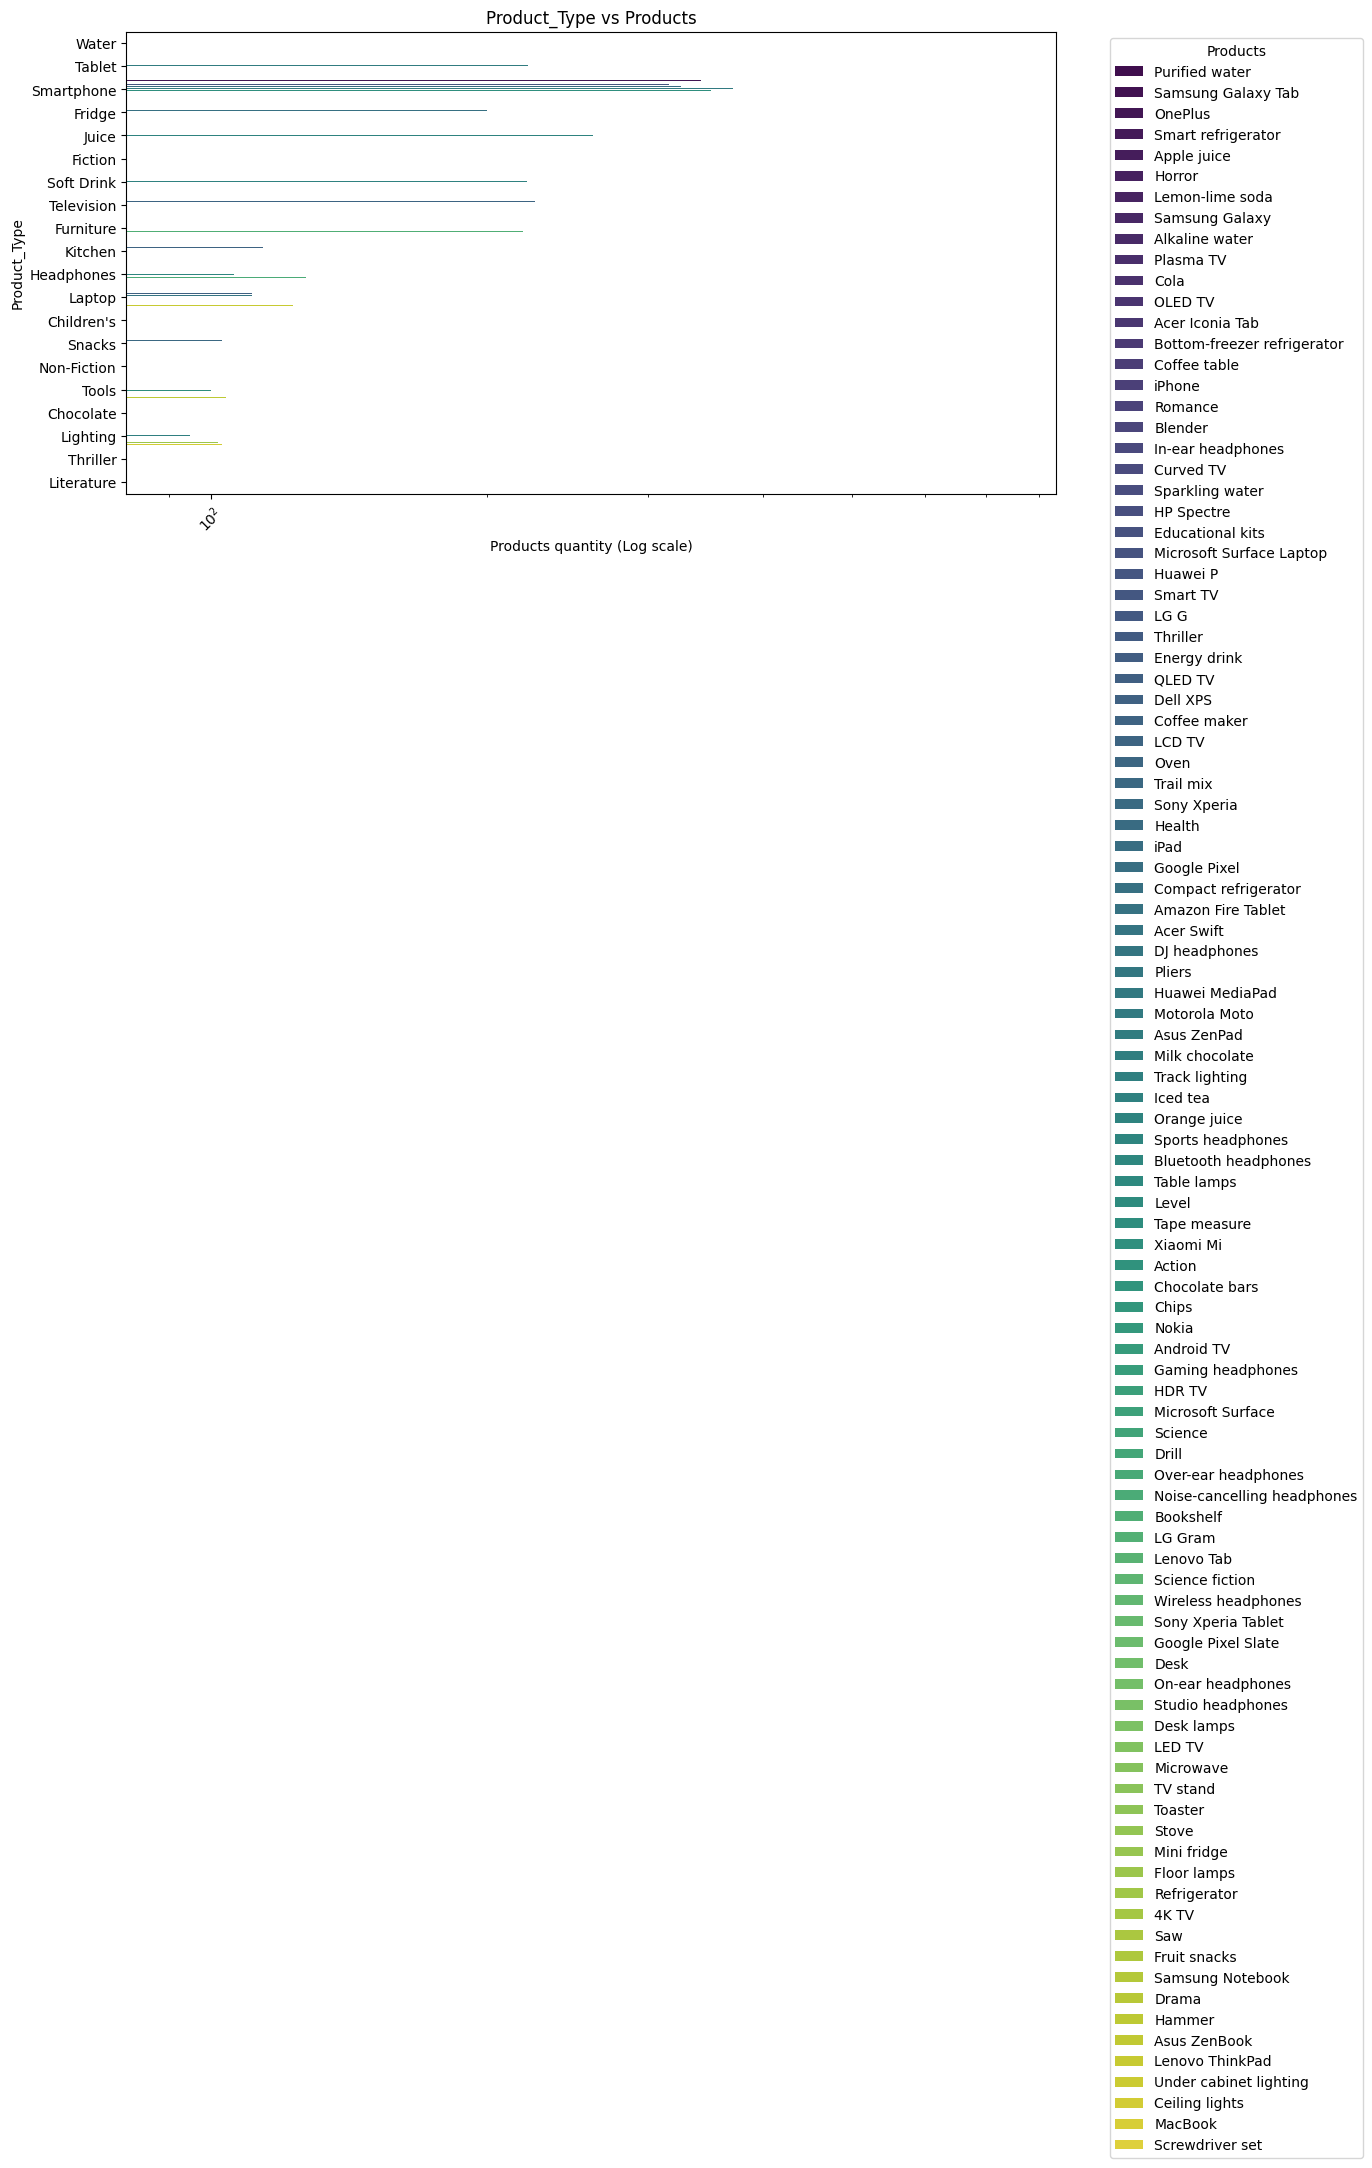

C:\Users\Arturo A Gallardo J\AppData\Local\Temp\ipykernel_27104\1559109805.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Product_Type', ax=ax[0], palette='viridis')
C:\Users\Arturo A Gallardo J\AppData\Local\Temp\ipykernel_27104\1559109805.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='products', ax=ax[1], palette='viridis')


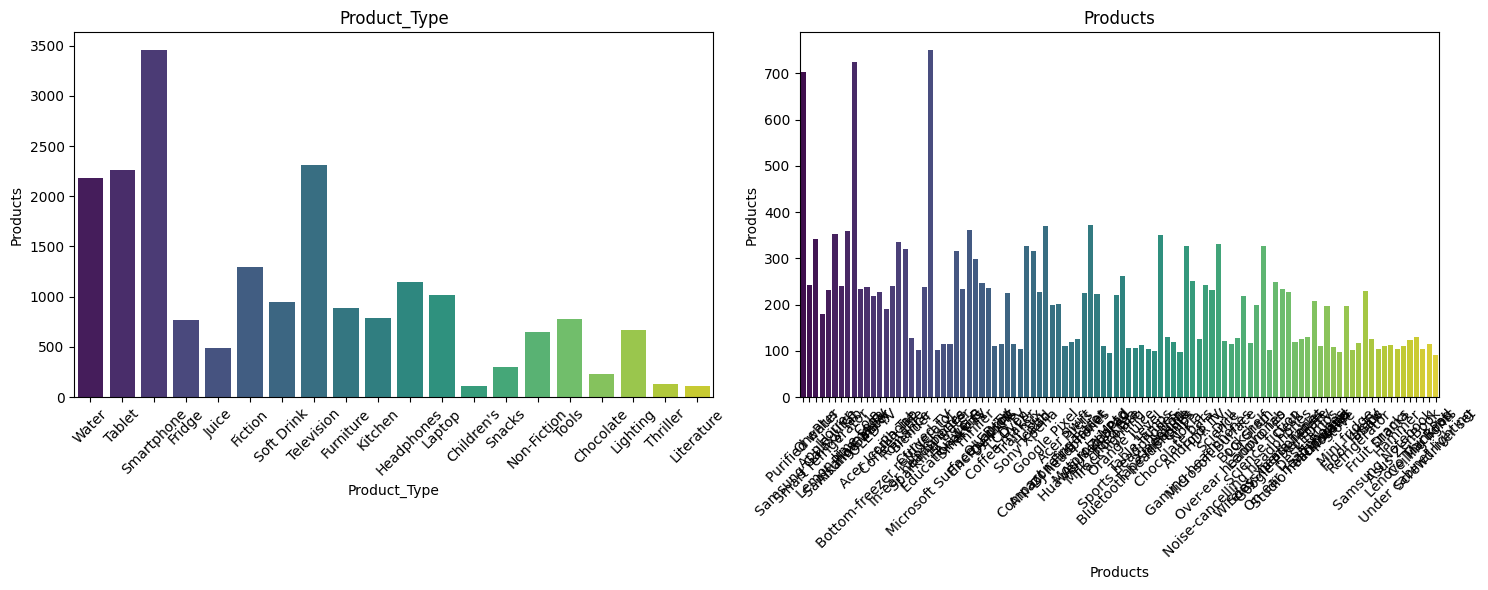

In [32]:
#Unique values

print("2. Unique values\n")

unique_values = df.nunique()

print("Unique values:")
print(unique_values)

#Product_Type vs Products
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Product_Type', hue='products', palette='viridis')

plt.xscale('log')

plt.title('Product_Type vs Products')
plt.xlabel('Products quantity (Log scale)')
plt.ylabel('Product_Type')

plt.xticks(rotation=45)
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico para Product_Type
sns.countplot(data=df, x='Product_Type', ax=ax[0], palette='viridis')
ax[0].set_title('Product_Type')
ax[0].set_xlabel('Product_Type')
ax[0].set_ylabel('Products')
ax[0].tick_params(axis='x', rotation=45)

# Gráfico para Products
sns.countplot(data=df, x='products', ax=ax[1], palette='viridis')
ax[1].set_title('Products')
ax[1].set_xlabel('Products')
ax[1].set_ylabel('Products')
ax[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [35]:


# Group data by 'products' and calculate the total 'Total_Purchases' for each product
product_purchases = df.groupby('products')['Total_Purchases'].sum().reset_index()

# Sort products by total purchases in ascending order
product_purchases_sorted = product_purchases.sort_values(by='Total_Purchases', ascending=False)

pd.set_option('display.max_rows', None)

# Print the results
print("Top 73 products with the fewest purchases:")
print(product_purchases_sorted)

Top 73 products with the fewest purchases:
                       products  Total_Purchases
84              Sparkling water             4011
69               Purified water             3791
4                Alkaline water             3747
33                 Google Pixel             1999
39                       Horror             1998
58                Motorola Moto             1978
46                         LG G             1945
97                    Xiaomi Mi             1894
73               Samsung Galaxy             1879
63                      OnePlus             1833
78              Science fiction             1784
60                        Nokia             1756
99                       iPhone             1747
38                       Health             1733
82                  Sony Xperia             1693
77                      Science             1685
72                      Romance             1683
41                     Huawei P             1651
91                     Thr

1. Null values

Quantity of null values:
Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

Percentage of null values:
Transaction_ID      0.110261
Customer_ID         0.101983
Name                0.126486
Email               0.114897
Phone               0.119864
Address             0.104301
City                0.08

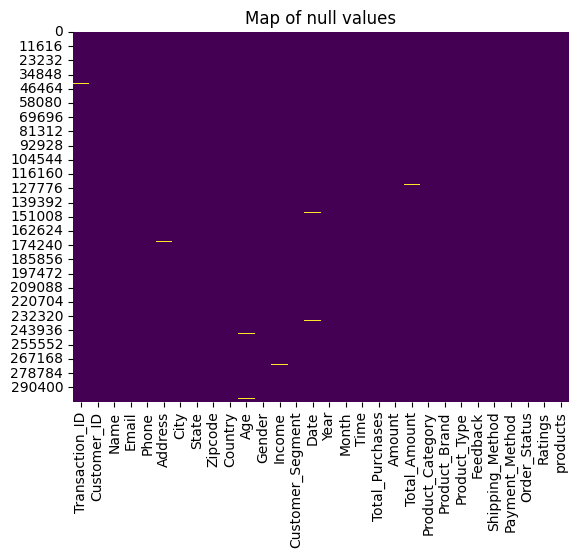

2. Unique values

Unique values:
Transaction_ID      294461
Customer_ID          86766
Name                159390
Email                52897
Phone               299295
Address             299329
City                   130
State                   54
Zipcode              93978
Country                  5
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Date                   366
Year                     2
Month                   12
Time                 83677
Total_Purchases         10
Amount              299297
Total_Amount        299305
Product_Category         5
Product_Brand           18
Product_Type            33
Feedback                 4
Shipping_Method          3
Payment_Method           4
Order_Status             4
Ratings                  5
products               318
dtype: int64


2024/11/09 11:04:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run EDA at: http://127.0.0.1:5000/#/experiments/1/runs/267b22b0e42842338fad860102f14422.
2024/11/09 11:04:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


FileNotFoundError: [Errno 2] No such file or directory: 'product_type_vs_products.png'

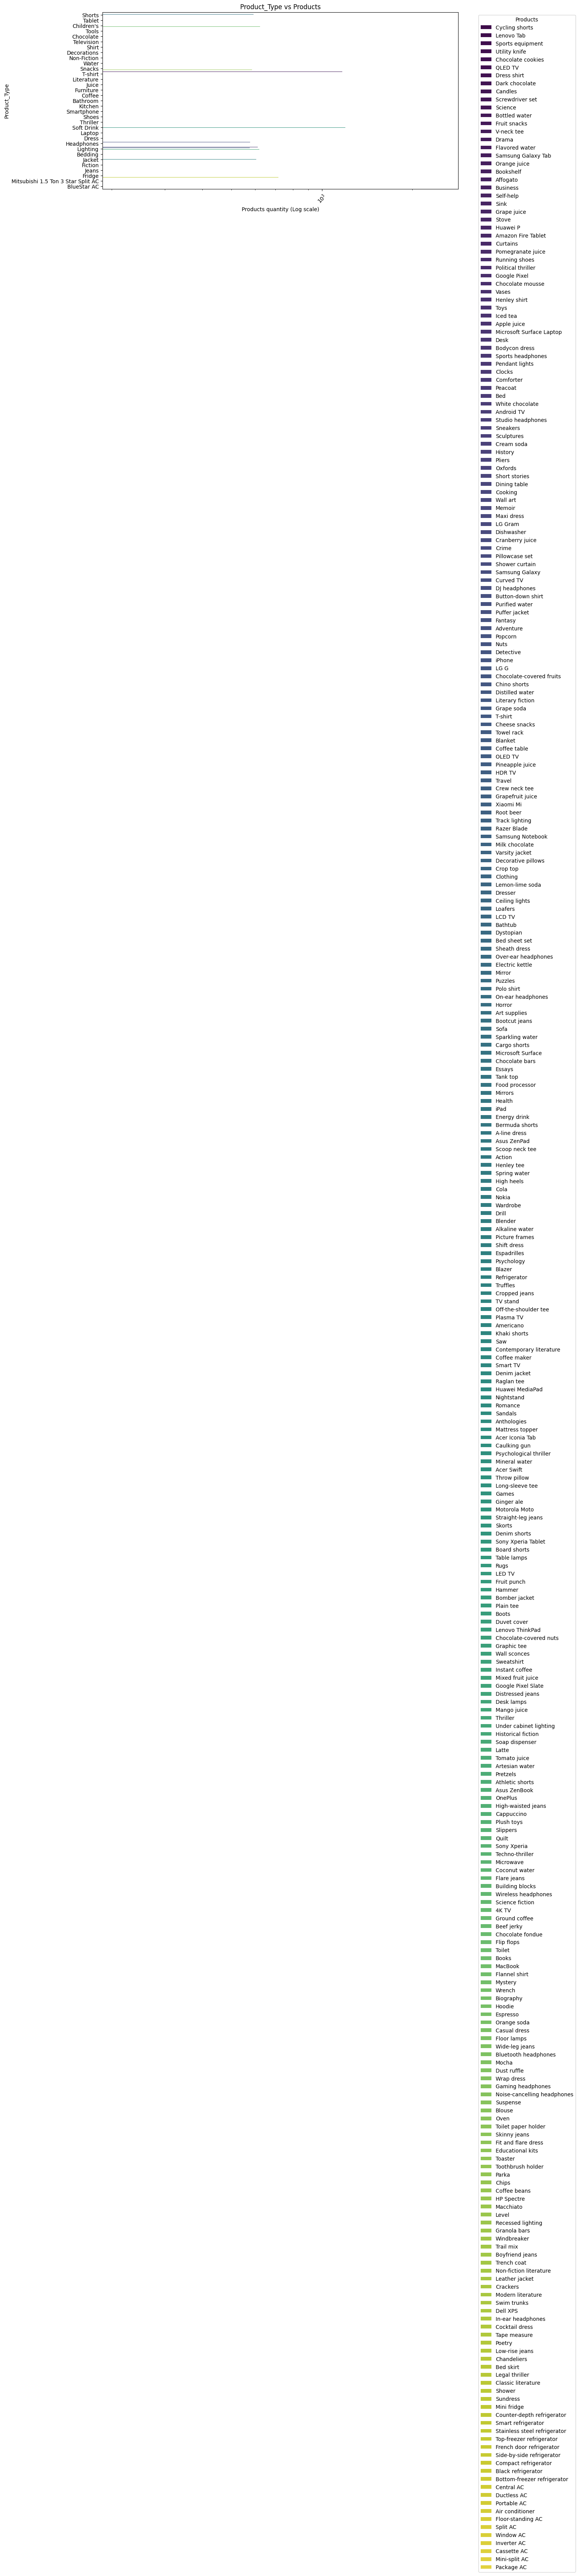

In [17]:
# Only if MLflow is running:

figures_path = "D:/MNA_SWFiles/TC4016_SW/SIP/TC4016_SW_Group_10/reports/figures"
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

with mlflow.start_run(run_name="EDA"):

    print("1. Null values\n")
    null_values = df.isnull().sum()
    null_percentage = (null_values / len(df)) * 100

    # Register parameters in MLFlow
    mlflow.log_param("null_values", null_values.to_dict()) 
    mlflow.log_param("null_percentage", null_percentage.to_dict())

    print("Quantity of null values:")
    print(null_values)
    print("\nPercentage of null values:")
    print(null_percentage)

    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Map of null values')
    
    # Save chart local and in MLflow
    local_path = f"{figures_path}/null_values_heatmap.png"
    plt.savefig(local_path, bbox_inches='tight')
    mlflow.log_artifact(local_path)  # Now passing full path
    plt.show()

    # Register Null values information
    print("2. Unique values\n")
    unique_values = df.nunique()
    mlflow.log_param("unique_values", unique_values.to_dict())

    print("Unique values:")
    print(unique_values)

    # Graph: Product_Type vs Products
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y='Product_Type', hue='products', palette='viridis')
    plt.xscale('log')
    plt.title('Product_Type vs Products')
    plt.xlabel('Products quantity (Log scale)')
    plt.ylabel('Product_Type')
    plt.xticks(rotation=45)
    plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Save chart local and in MLflow
    plt.savefig(f"{figures_path}/product_type_vs_products.png", bbox_inches='tight')
    mlflow.log_artifact("product_type_vs_products.png")
    plt.show()

    # Graphs Product_Type y Products
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    sns.countplot(data=df, x='Product_Type', ax=ax[0], palette='viridis')
    ax[0].set_title('Product_Type')
    ax[0].set_xlabel('Product_Type')
    ax[0].set_ylabel('Products')
    ax[0].tick_params(axis='x', rotation=45)

    sns.countplot(data=df, x='products', ax=ax[1], palette='viridis')
    ax[1].set_title('Products')
    ax[1].set_xlabel('Products')
    ax[1].set_ylabel('Products')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.savefig(f"{figures_path}/product_counts.png", bbox_inches='tight')
    #plt.savefig("product_counts.png")
    mlflow.log_artifact("product_counts.png")
    plt.show()

    # Filtrar productos con más de 7500 ocurrencias
    product_counts = df['Product_Type'].value_counts()
    filtered_product_types = product_counts[product_counts > 7500].index
    df_filtered = df[df['Product_Type'].isin(filtered_product_types)]
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')
    df_filtered = df_filtered.sort_values('Year_Month')

    # Top 20 Best and Worst Rated Products
    product_ratings = df[['products', 'Ratings']].dropna().groupby('products').mean().reset_index()
    top_20_best_rated = product_ratings.sort_values(by='Ratings', ascending=False).head(20)
    top_20_worst_rated = product_ratings.sort_values(by='Ratings', ascending=True).head(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_20_best_rated, x='Ratings', y='products', palette='viridis')
    plt.title('Top 20 Best Rated Products')
    plt.xlabel('Average Rating')
    plt.ylabel('Product')
    
    # Guardar gráfico en MLFlow
    plt.savefig(f"{figures_path}/top_20_best_rated.png", bbox_inches='tight')
    #plt.savefig("top_20_best_rated.png")
    mlflow.log_artifact("top_20_best_rated.png")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_20_worst_rated, x='Ratings', y='products', palette='coolwarm')
    plt.title('Top 20 Worst Rated Products')
    plt.xlabel('Average Rating')
    plt.ylabel('Product')
    
    # Guardar gráfico en MLFlow
    plt.savefig(f"{figures_path}/top_20_worst_rated.png", bbox_inches='tight')
    #plt.savefig("top_20_worst_rated.png")
    mlflow.log_artifact("top_20_worst_rated.png")
    plt.show()

    country_counts = df['Country'].value_counts()

    # 2. Calcular el porcentaje específico para USA
    usa_percentage = (country_counts.get('USA', 0) / country_counts.sum()) * 100
    print(f"Percentage of products purchased in USA: {usa_percentage:.2f}%")

    # 3. Gráfico de barras: Total de productos por país
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
    plt.title('Country_Purchases')
    plt.xlabel('Country')
    plt.ylabel('Total Products')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Guardar gráfico en MLFlow
    plt.savefig(f"{figures_path}/Country_Purchases_bar.png", bbox_inches='tight')
    #plt.savefig("Country_Purchases_bar.png")
    mlflow.log_artifact("Country_Purchases_bar.png")
    plt.show()

    # 4. Gráfico circular (opcional): Distribución de productos por país
    plt.figure(figsize=(8, 8))
    plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(country_counts)))
    plt.title('Country_Purchases')

        # Guardar gráfico en MLFlow
    plt.savefig(f"{figures_path}/Country_Purchases_pie.png", bbox_inches='tight')
    #plt.savefig("Country_Purchases_pie.png")
    mlflow.log_artifact("Country_Purchases_pie.png")
    plt.show()

Preprocess

In [19]:
#
# Check if MLflow is available
try:
    import mlflow
    mlflow_available = True
except ImportError:
    mlflow_available = False

# Ensure any previous MLflow run is ended before starting a new one
if mlflow_available and mlflow.active_run() is not None:
    mlflow.end_run()

# Start a single MLflow run for all data cleaning steps
if mlflow_available:
    mlflow.start_run(run_name="Data_Cleaning")

# Step 1: Filter rows where Country is "USA"
df_filtered = df[(df['Country'] == 'USA') & (df['Order_Status'] == 'Delivered')]
initial_rows = len(df)
filtered_rows_usa_delivered = len(df_filtered)

# Log the filtering step to MLflow
if mlflow_available:
    mlflow.log_param("country_filter", "USA")
    mlflow.log_param("order_status_filter", "Delivered")
    mlflow.log_param("initial_row_count", initial_rows)
    mlflow.log_param("filtered_row_count_usa_delivered", filtered_rows_usa_delivered)

# Step 2: Drop rows with null values in specific columns (e.g., 'Customer_ID' and 'Product_Type')
df_filtered = df_filtered.dropna(subset=['Customer_ID', 'Product_Type'])
filtered_rows_no_nulls_specific = len(df_filtered)

# Log the null value removal step
if mlflow_available:
    mlflow.log_param("dropped_nulls_in_columns", ['Customer_ID', 'Product_Type'])
    mlflow.log_param("filtered_row_count_no_nulls_specific", filtered_rows_no_nulls_specific)

# Step 3: Remove duplicate rows
df_filtered = df_filtered.drop_duplicates()
final_rows_deduped = len(df_filtered)

# Log the duplicate removal step
if mlflow_available:
    mlflow.log_param("removed_duplicates", True)
    mlflow.log_param("row_count_after_deduplication", final_rows_deduped)

# Step 4: Drop unnecessary columns
columns_to_drop = ['Product_Brand', 'Customer_Segment', 'Product_Type', 'Age', 'Date', 'Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Country', 'Zipcode', 'Time', 'Income', 'Payment_Method', 'Shipping_Method', 'Feedback', 'Product_Category', 'Order_Status']
df_filtered = df_filtered.drop(columns=columns_to_drop)
final_rows_after_column_drop = len(df_filtered)

# Log the column removal step
if mlflow_available:
    mlflow.log_param("dropped_columns", columns_to_drop)
    mlflow.log_param("row_count_after_column_drop", final_rows_after_column_drop)

# Step 5: Drop all remaining rows with missing values
df_filtered = df_filtered.dropna()
final_rows_no_missing_values = len(df_filtered)

# Log the complete removal of missing values
if mlflow_available:
    mlflow.log_param("dropped_all_missing_values", True)
    mlflow.log_param("final_row_count_no_missing_values", final_rows_no_missing_values)

# Save the cleaned DataFrame as a new CSV file
output_dir = "D:/MNA_SWFiles/TC4016_SW/SIP/TC4016_SW_Group_10/data"
output_filename = "Cleaned_Retail_data.csv"
output_filepath = os.path.join(output_dir, output_filename)

df_filtered.to_csv(output_filepath, index=False)

# Log the saved file path to MLflow
if mlflow_available:
    mlflow.log_param("output_file_path", output_filepath)

# End the MLflow run after completing all cleaning steps
if mlflow_available:
    mlflow.end_run()

print(f"Total rows after cleaning (no missing values): {final_rows_no_missing_values}")
print(f"Cleaned data saved to: {output_filepath}")
df_filtered.info()

2024/11/09 11:36:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Data_Cleaning at: http://127.0.0.1:5000/#/experiments/1/runs/a1bc63138338473cb78b0707719c06bc.
2024/11/09 11:36:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.
2024/11/09 11:36:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Data_Cleaning at: http://127.0.0.1:5000/#/experiments/1/runs/10634a5b3ecc479b9bb4021db7da1b87.
2024/11/09 11:36:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


Total rows after cleaning (no missing values): 39734
Cleaned data saved to: D:/MNA_SWFiles/TC4016_SW/SIP/TC4016_SW_Group_10/data\Cleaned_Retail_data.csv
<class 'pandas.core.frame.DataFrame'>
Index: 39734 entries, 17800 to 302004
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           39734 non-null  object 
 1   Year             39734 non-null  float64
 2   Month            39734 non-null  object 
 3   Total_Purchases  39734 non-null  float64
 4   Amount           39734 non-null  float64
 5   Total_Amount     39734 non-null  float64
 6   Ratings          39734 non-null  float64
 7   products         39734 non-null  object 
dtypes: float64(5), object(3)
memory usage: 2.7+ MB


In [114]:
df_filtered.head()


,Gender,Year,Month,Total_Purchases,Amount,Total_Amount,Ratings,products
17800,Female,2023.0,October,6.0,241.823076,1450.938458,2.0,Bed
17807,Female,2024.0,February,9.0,93.552348,841.971130,4.0,Psychology
17815,Female,2023.0,December,7.0,494.749655,3463.247584,3.0,Sneakers
17841,Male,2023.0,December,7.0,437.822368,3064.756579,4.0,Dresser
17844,Male,2023.0,November,8.0,170.082122,1360.656973,4.0,Loafers


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import mlflow

# Ensure any previous MLflow run is ended before starting a new one
if mlflow_available and mlflow.active_run() is not None:
    mlflow.end_run()

# Start a new MLflow run for data preparation steps
if mlflow_available:
    mlflow.start_run(run_name="Data_Preprocessing")

# Step 1: Encode categorical columns using one-hot encoding
categorical_columns = ['Gender', 'products', 'Month']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_filtered, columns=categorical_columns, drop_first=True)

# Convert boolean values (True/False) to integers (1/0)
df_encoded = df_encoded.astype(int)

# Log the number of encoded columns
if mlflow_available:
    mlflow.log_param("one_hot_encoded_columns", categorical_columns)
    mlflow.log_param("encoded_column_count", df_encoded.shape[1])

# Step 2: Normalize or standardize numerical columns
numerical_columns = ['Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']

scaler = StandardScaler()  # Use MinMaxScaler() if normalization is preferred
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Log the scaler type used
if mlflow_available:
    mlflow.log_param("scaler_type", "StandardScaler")

# Save the preprocessed DataFrame to a new CSV file
preprocessed_filepath = os.path.join(output_dir, "preprocessed_retail_data.csv")
df_encoded.to_csv(preprocessed_filepath, index=False)

# Log the preprocessed file path to MLflow
if mlflow_available:
    mlflow.log_param("preprocessed_file_path", preprocessed_filepath)

# End the MLflow run
if mlflow_available:
    mlflow.end_run()

print(f"Preprocessed data saved to: {preprocessed_filepath}")

2024/11/09 11:36:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Data_Preprocessing at: http://127.0.0.1:5000/#/experiments/1/runs/99b1d876bcdd4e398e3ae304b54973bb.
2024/11/09 11:36:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


Preprocessed data saved to: D:/MNA_SWFiles/TC4016_SW/SIP/TC4016_SW_Group_10/data\preprocessed_retail_data.csv


In [21]:
df_encoded.head()

,Year,Total_Purchases,Amount,Total_Amount,Ratings,Gender_Male,products_A-line dress,products_Acer Iconia Tab,products_Acer Swift,products_Action,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
17800,2023,0.226103,-0.093880,0.079544,-0.767045,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17807,2024,1.271804,-1.141622,-0.462538,0.773208,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17815,2023,0.574670,1.697192,1.871353,0.003082,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17841,2023,0.574670,1.293670,1.516195,0.773208,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17844,2023,0.923237,-0.596513,-0.000566,0.773208,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Model RMSE: 0.9941183714691681


d:\MNA_SWFiles\TC4016_SW\SW_VEnv2\lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/11/09 11:56:20 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      -0.47103147157879727,
      -0.3254596126819785,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
      0.0,
   

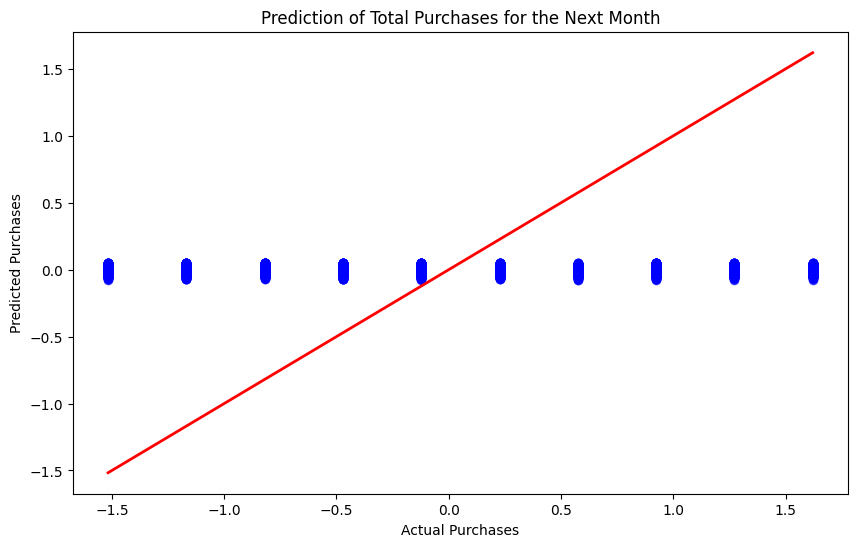

2024/11/09 11:56:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Model_Training at: http://127.0.0.1:5000/#/experiments/1/runs/1d12c0098d4e41b3b5f484059741fb95.
2024/11/09 11:56:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Ensure any previous MLflow run is ended before starting a new one
if mlflow_available and mlflow.active_run() is not None:
    mlflow.end_run()
    
# Step 1: Create features (X) and target (y)
# 'Total_Purchases' is the total amount of products sold in a month

# Create lagged columns for previous month purchases and amount
df_encoded['Total_Purchases_Lag1'] = df_encoded['Total_Purchases'].shift(1)
df_encoded['Total_Amount_Lag1'] = df_encoded['Total_Amount'].shift(1)

# Drop rows with NaN values (due to 'shift' operation)
df_encoded = df_encoded.dropna(subset=['Total_Purchases_Lag1', 'Total_Amount_Lag1'])
#df_encoded = df_encoded.astype({'Total_Purchases_Lag1': 'float64', 'Total_Amount_Lag1': 'float64'})
#df_encoded.loc[df_encoded['Total_Purchases_Lag1'].isna(), 'Total_Purchases_Lag1'] = 0
#df_encoded.loc[df_encoded['Total_Amount_Lag1'].isna(), 'Total_Amount_Lag1'] = 0

#df_encoded = df_encoded.astype({'Total_Purchases_Lag1': 'float64', 'Total_Amount_Lag1': 'float64'})

# Update features selection: Use the dummy columns for the 'Month' column after one-hot encoding
# 'Month' column is now split into multiple columns like 'Month_1', 'Month_2', ..., etc.
month_columns = [col for col in df_encoded.columns if col.startswith('Month_')]

# Define features and target
X = df_encoded[['Total_Purchases_Lag1', 'Total_Amount_Lag1'] + month_columns]  # Using lagged purchases, amount and month dummies as features
y = df_encoded['Total_Purchases']  # The target is to predict the total purchases

# Start a new MLflow run for model training
if mlflow_available:
    #mlflow.end_run()  # End any previous active run before starting a new one
    mlflow.start_run(run_name="Model_Training")

# Step 2: Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Log the scaler information
if mlflow_available:
    #mlflow.end_run()  # End any previous active run before starting a new one
    mlflow.log_param("scaler_type", "StandardScaler")

# Step 4: Fit the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Log model parameters
if mlflow_available:
    #mlflow.end_run()  # End any previous active run before starting a new one
    mlflow.log_param("model_type", "LinearRegression")

# Step 5: Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

# Log evaluation metrics
if mlflow_available:
    #mlflow.end_run()  # End any previous active run before starting a new one
    mlflow.log_metric("rmse", rmse)

print(f"Model RMSE: {rmse}")

# For input example, you can use a single row of data from the training set
input_example = X_train.iloc[0].values.reshape(1, -1)


from mlflow.models import convert_input_example_to_serving_input
from mlflow.models.signature import infer_signature
signature = infer_signature(X_train, y_train)
serving_input_example = convert_input_example_to_serving_input(input_example)

# Log the model artifacts
if mlflow_available:
    mlflow.sklearn.log_model(model, "model", signature=signature, input_example=input_example)

# Step 6: Plot predicted vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Purchases')
plt.ylabel('Predicted Purchases')
plt.title('Prediction of Total Purchases for the Next Month')
plt.show()

# End the MLflow run
if mlflow_available:
    mlflow.end_run()